# Standardization


In [83]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [84]:
df = pd.read_csv('Social_Network_Ads.csv')
df = df.drop(['User ID' , 'Gender'] , axis = 1)
df.sample(10)

,Age,EstimatedSalary,Purchased
299,46,117000,1
21,47,49000,1
200,35,39000,0
50,24,32000,0
100,27,88000,0
193,19,70000,0
313,49,141000,1
267,37,74000,0
275,57,74000,1
248,41,52000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

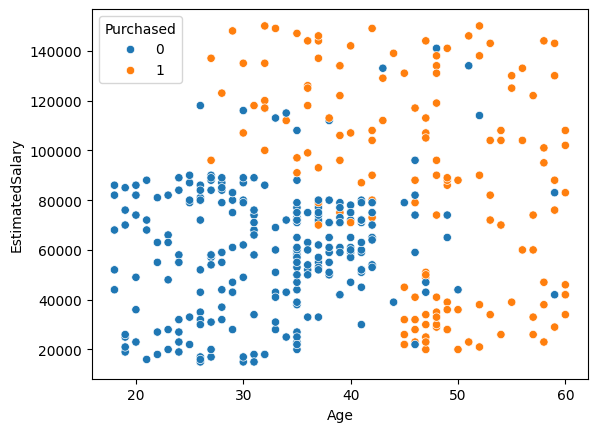

In [85]:

sns.scatterplot(x = 'Age' , y='EstimatedSalary' , data = df , hue = 'Purchased')

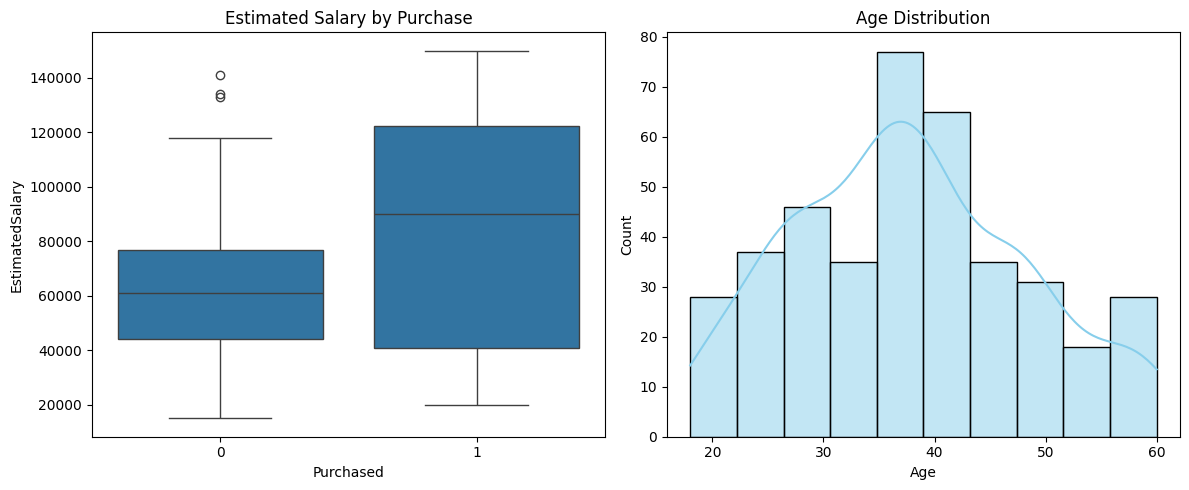

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First plot: Boxplot on the first subplot
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df, ax=axes[0])
axes[0].set_title('Estimated Salary by Purchase')

# Second plot: Histogram on the second subplot
sns.histplot(df['Age'], kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Age Distribution')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [87]:
from  sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop('Purchased',axis = 1) , df['Purchased'] , test_size = 0.3 , random_state= 0)

In [88]:
# y_train = pd.DataFrame(y_train)
# y_test =pd.DataFrame(y_test)

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#training on training set
scaler.fit(x_train)

#transform both the train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [90]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [91]:
print(x_train.describe())
x_train

              Age  EstimatedSalary
count  280.000000       280.000000
mean    37.864286     69807.142857
std     10.218201     34641.201654
min     18.000000     15000.000000
25%     30.000000     43000.000000
50%     37.000000     70500.000000
75%     46.000000     88000.000000
max     60.000000    150000.000000


,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [92]:
x_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [93]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)
x_test_scaled


,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [94]:
np.round(x_train.describe() ,1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [95]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [96]:
np.round(x_test.describe(), 1)

,Age,EstimatedSalary
count,120.0,120.0
mean,37.2,69591.7
std,11.1,32933.7
min,18.0,15000.0
25%,28.0,47000.0
50%,36.0,64500.0
75%,45.2,87000.0
max,60.0,150000.0


In [97]:
np.round(x_test_scaled.describe(), 1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


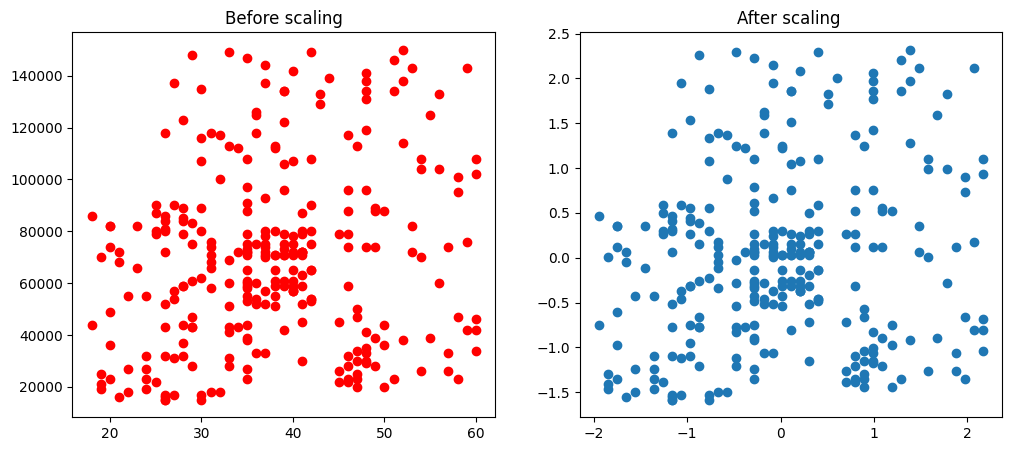

In [98]:
fig,axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter(x_train['Age'] , x_train['EstimatedSalary'] , c = 'red')
axes[0].set_title("Before scaling")
axes[1].scatter(x_train_scaled['Age'] , x_train_scaled['EstimatedSalary'])
axes[1].set_title("After scaling ")
plt.show()

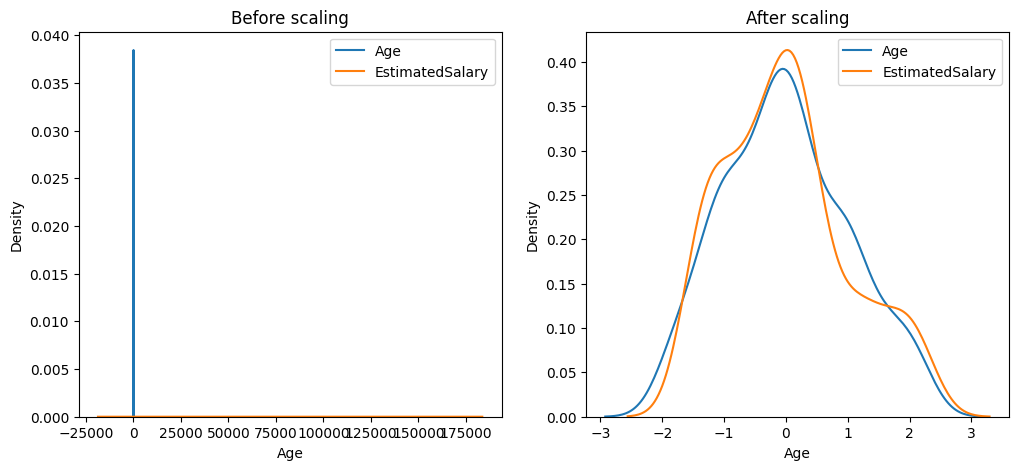

In [99]:
fig , axes = plt.subplots(1,2 , figsize=(12,5))

axes[0].set_title("Before scaling")
sns.kdeplot(x_train['Age'] , ax = axes[0],label = 'Age')
sns.kdeplot(x_train['EstimatedSalary'] ,ax = axes[0] , label = 'EstimatedSalary')
axes[0].legend()

axes[1].set_title('After scaling')
sns.kdeplot(x_train_scaled['Age'] , ax = axes[1],label = 'Age')
sns.kdeplot(x_train_scaled['EstimatedSalary'] ,ax = axes[1], label = 'EstimatedSalary')
axes[1].legend()
plt.show()

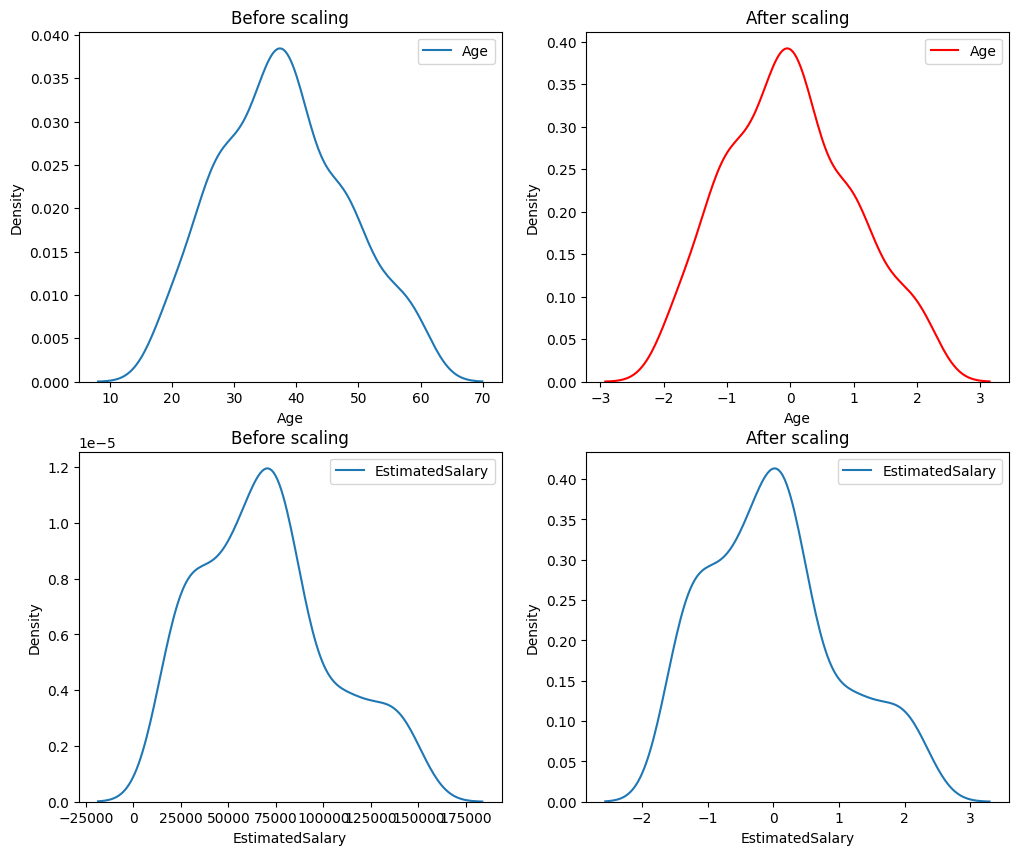

In [100]:
fig , axes = plt.subplots(2,2 , figsize=(12,10))
axes[0][0].set_title("Before scaling")
sns.kdeplot(x_train['Age'] , ax = axes[0][0],label = 'Age')
axes[0][0].legend()    

axes[0][1].set_title('After scaling')
sns.kdeplot(x_train_scaled['Age'] , ax = axes[0][1],label = 'Age',  color= 'red')

axes[0][1].legend()


axes[1][0].set_title('Before scaling')
sns.kdeplot(x_train['EstimatedSalary'] ,ax = axes[1][0], label = 'EstimatedSalary')
axes[1][0].legend()


axes[1][1].set_title('After scaling')

sns.kdeplot(x_train_scaled['EstimatedSalary'] ,ax = axes[1][1], label = 'EstimatedSalary')
axes[1][1].legend()



plt.show()


# Testing power of scaling with a model

In [101]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [102]:
x_train_scaled , y_train

(          Age  EstimatedSalary
 0   -1.163172        -1.584970
 1    2.170181         0.930987
 2    0.013305         1.220177
 3    0.209385         1.075582
 4    0.405465        -0.486047
 ..        ...              ...
 275  0.993704        -1.151185
 276 -0.869053        -0.775237
 277 -0.182774        -0.514966
 278 -1.065133        -0.457127
 279 -1.163172         1.393691
 
 [280 rows x 2 columns],
 92     0
 223    1
 234    0
 232    1
 377    0
       ..
 323    1
 192    0
 117    0
 47     0
 172    0
 Name: Purchased, Length: 280, dtype: int64)

In [103]:
lr.fit(x_train , y_train)
lr_scaled.fit(x_train_scaled , y_train)

LogisticRegression()

In [104]:
y_predict = lr.predict(x_test)
y_predict_scaled = lr_scaled.predict(x_test_scaled)

In [105]:
from sklearn.metrics import accuracy_score 

In [106]:
print("actual")
print(accuracy_score(y_test, y_predict)*100)
print("scaled")
print(accuracy_score(y_test, y_predict_scaled)*100)

actual
87.5
scaled
86.66666666666667


In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [109]:
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [110]:
dt_scaled.fit(x_train_scaled , y_train)

DecisionTreeClassifier()

In [111]:
y_pred = dt.predict(x_test)

In [112]:
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [113]:

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [114]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [115]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Effect of outliers 

In [116]:
outliers = pd.DataFrame({
    'Age': [100, 120, 130],  # Example outlier ages
    'EstimatedSalary': [500000, 600000, 700000],  # Example outlier salaries
    'Purchased': [0, 1, 0]  # Outlier purchase values
})

# Append the outliers to the original DataFrame
df = pd.concat([df, outliers], ignore_index=True)

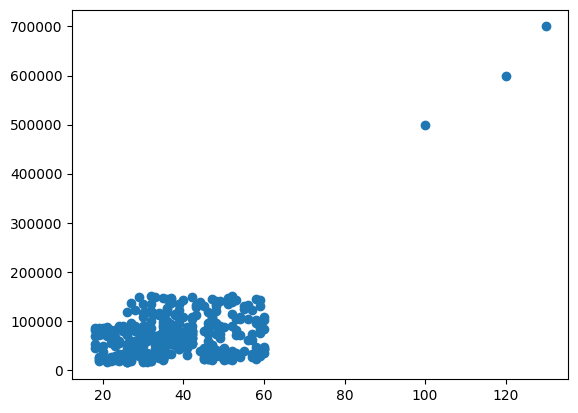

In [117]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [118]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop('Purchased' , axis = 1) , df['Purchased'] , test_size= 0.3 , random_state = 0)

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [120]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)

In [121]:
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns)

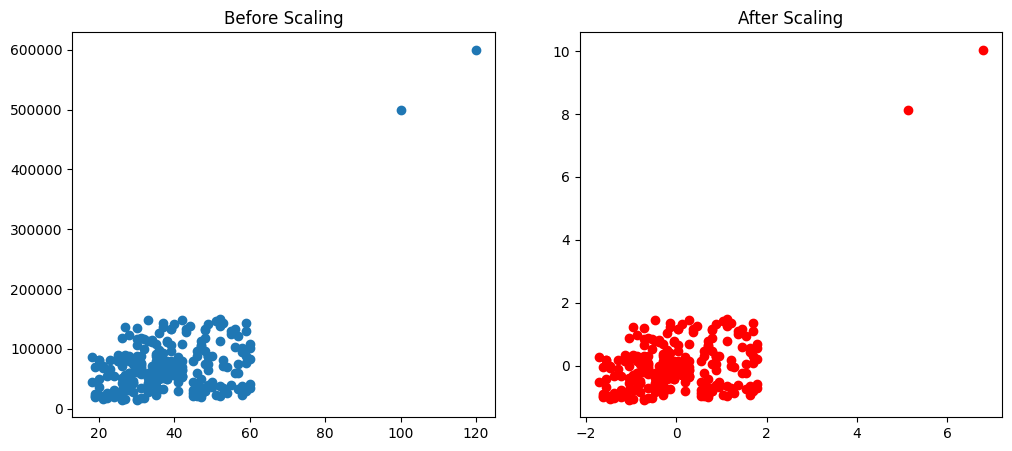

In [122]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

# This shows outlier impact remains same after scaling 